# 1. Spotting correlations

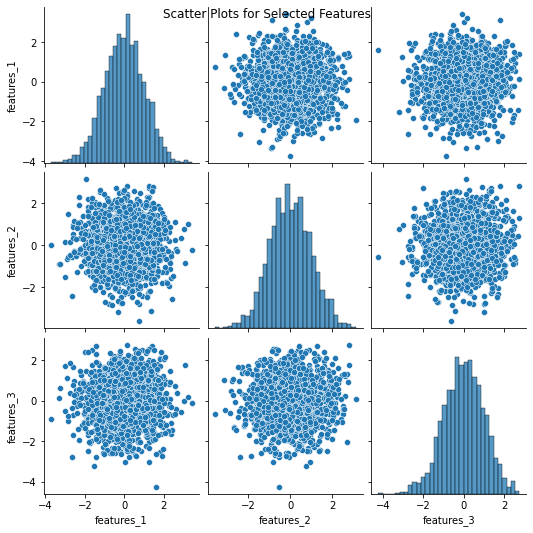

Correlation Matrix:             features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
url = 'https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv'
df = pd.read_csv("regression_generated.csv")
selected_features = ['features_1', 'features_2', 'features_3']
sns.pairplot(df[selected_features])
plt.suptitle('Scatter Plots for Selected Features')
plt.show()
correlation_matrix = df[selected_features].corr()
print("Correlation Matrix:", correlation_matrix)
# Interpretation of the confusion matrix:
# feature1 X feature2 = -0.00522 this value is very close to 0 which indicates a weak negative correlation between both of them.
# feature1 X feature3 = 0.02369 this value is very close to 0. This indicates a weak negative correlation between both of them.
# feature2 X feature3 = 0.04736 this value is very close to 0. This indicates a weak negative correlation between both of them.

# 2. Color-coded scatter plot

In [1]:
import numpy as np
def generate_dataset(num_samples, mean1, std_dev1, mean2, std_dev2):
    category1_samples = np.random.normal(mean1, std_dev1, size=(num_samples, 2))
    category2_samples = np.random.normal(mean2, std_dev2, size=(num_samples, 2))
    dataset = np.vstack([category1_samples, category2_samples]) # combining the samples
    labels = np.hstack([np.zeros(num_samples), np.ones(num_samples)]) # Create labels for the categories (0 for category 1, 1 for category 2)
    return dataset, labels

In [2]:
mean1, std_dev1 = [1, 2], [1, 1]
mean2, std_dev2 = [4, 5], [1.5, 1]
dataset, labels = generate_dataset(100, mean1, std_dev1, mean2, std_dev2)
print(dataset)

[[ 0.58756651  2.72896517]
 [ 1.53221649  3.38093326]
 [ 1.74639489  1.84401889]
 [ 1.36169711  3.7709295 ]
 [ 0.53281486  1.33603429]
 [-2.13108874  2.6268044 ]
 [ 3.09076537  2.75021136]
 [ 0.90546011  1.96144949]
 [-0.04381911  1.90642825]
 [ 0.12988396  1.15359651]
 [-0.49474727  1.55466085]
 [ 0.61636845  3.51041235]
 [ 2.51327389  1.14480999]
 [ 2.14906399  2.35492309]
 [ 1.54436602  1.64064317]
 [-0.63120956 -0.03538853]
 [ 1.13201256  1.66820698]
 [ 1.2308892   3.50890245]
 [ 1.35796196  0.66008561]
 [ 1.06315325  2.3271195 ]
 [-0.40877615  2.04776371]
 [ 1.45598127  1.78329618]
 [ 1.44418525  0.91496918]
 [ 1.3923793   1.83033772]
 [ 0.39298667  1.4130151 ]
 [-0.86959909  1.73298338]
 [ 0.0920524  -0.40542996]
 [ 1.29037176 -0.51350191]
 [ 0.14773732  4.78396503]
 [ 0.08282012  3.45333932]
 [-0.27608544  2.65369835]
 [ 2.50630611  2.16843232]
 [ 0.27198972  2.60620614]
 [-0.91545427  1.96018092]
 [ 1.93168094  3.95825049]
 [ 1.73384181  2.30481997]
 [ 1.84732852  1.20850033]
 

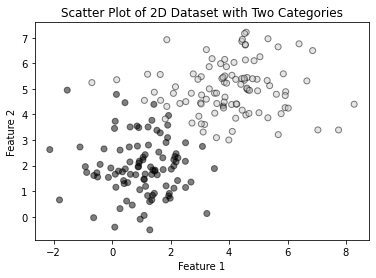

In [5]:
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='nipy_spectral',  edgecolors='k', marker='o', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of 2D Dataset with Two Categories')
plt.show()

# 3. Profile plot

In [6]:
import pickle
# we read pkl files using the pickle library
with open('residuals_261.pkl', 'rb') as file:
    data3 = pickle.load(file)

print(data3)
df3 = pd.DataFrame(data3, columns=['residuals', 'distances']) #definig the dataframe
cleaned_df = df3[abs(df3[0]) < 2] #filtering the dataframe
joint_plot = sns.jointplot(x='distances', y='residuals', data=cleaned_df, kind='reg', height=7) #visualizing
plt.show()

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


ValueError: Must pass 2-d input. shape=()

# 4. Kernel Density Estimate

No handles with labels found to put in legend.


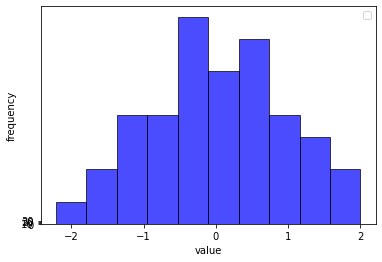

In [10]:
x = np.random.normal(0, 1, 100) # the array x is filled with a variable normally distributed
hist, edges = np.histogram(x, bins=10, density=True) # creating the histogram of the data with 10 bins, normalized to form a probability density
fig, ax = plt.subplots() #create the subplots
ax.set_xlabel('value') # setting the labels for the x axis
ax.set_ylabel('frequency') # setting the labels for the y axis
ax.set_yticks(np.arange(0, 0.4, 0.1)) #defining y as an intervals of 0.1 from 0 to 0.4
ax.set_yticklabels(np.arange(0, 40, 10).astype(int)) #defining x as an intervals of 0 from 0 to 40
ax.legend() # we add a legend
plt.hist(x, bins=10, edgecolor='black', color='blue', alpha=0.7)
standart_deviation= 1.06 * x.std() * 100**(-1/5) # the standard deviation formula